In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
# Exercise4-2

# 設計量子程式建構下列的量子線路，以量子電腦模擬器執行這個線路，以文字模式顯示測量的量子位元狀態出現的次數，並以繪圖模式顯示其直方圖。

               ┌─┐                     
q_0: ──■───────┤M├─────────────────────
     ┌─┴─┐     └╥┘┌─┐                  
q_1: ┤ X ├──────╫─┤M├──────────────────
     ├───┤      ║ └╥┘┌─┐               
q_2: ┤ X ├──■───╫──╫─┤M├───────────────
     ├───┤┌─┴─┐ ║  ║ └╥┘┌─┐            
q_3: ┤ X ├┤ X ├─╫──╫──╫─┤M├────────────
     └───┘└───┘ ║  ║  ║ └╥┘┌─┐         
q_4: ───────■───╫──╫──╫──╫─┤M├─────────
     ┌───┐┌─┴─┐ ║  ║  ║  ║ └╥┘┌─┐      
q_5: ┤ X ├┤ X ├─╫──╫──╫──╫──╫─┤M├──────
     ├───┤└───┘ ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ┤ X ├──■───╫──╫──╫──╫──╫──╫─┤M├───
     └───┘┌─┴─┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─────┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
          └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═══════════╩══╩══╩══╩══╩══╩══╩══╩═
                0  1  2  3  4  5  6  7 
Counts: {'11100100': 1000}


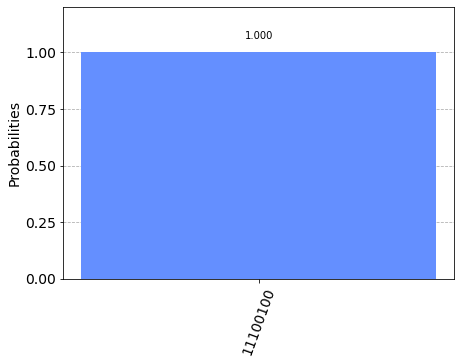


Quantum State (Total execution time: 1000)
|11100100〉: 1000.00%


In [4]:
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram


def showQState(statistic) :
    all_state = sorted(statistic.keys())
    total_count = sum(statistic.values())
    print("\nQuantum State (Total execution time: {})".format(total_count))
    for i in all_state :
        print("|{}〉: {:.2f}%".format(i, statistic[i]/total_count*1000))
        

qc = QuantumCircuit(8,8)
qc.cx(0,1)
qc.x(2)
qc.x(3)
qc.x(5)
qc.x(6)
qc.cx(2,3)
qc.cx(4,5)
qc.cx(6,7)
qc.measure(range(8),range(8))
print(qc)

sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
display(plot_histogram(counts))
showQState(counts)